# Loan Approval Pprediction ml model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')

In [4]:
data=pd.read_csv('LoanApprovalPrediction.csv')

In [6]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [12]:
# fromm abopove we can see there are 7 categorical features
# we will drop column Loan_ID because it is unique and not paricipate in the prediction
data.drop(columns=['Loan_ID'],axis=1,inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    object 
 1   Married            598 non-null    object 
 2   Dependents         586 non-null    float64
 3   Education          598 non-null    object 
 4   Self_Employed      598 non-null    object 
 5   ApplicantIncome    598 non-null    int64  
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         577 non-null    float64
 8   Loan_Amount_Term   584 non-null    float64
 9   Credit_History     549 non-null    float64
 10  Property_Area      598 non-null    object 
 11  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 56.2+ KB


In [34]:
data.select_dtypes(include='object').columns.tolist()

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [36]:
categorical_columns = data.select_dtypes(include='object').columns.tolist()

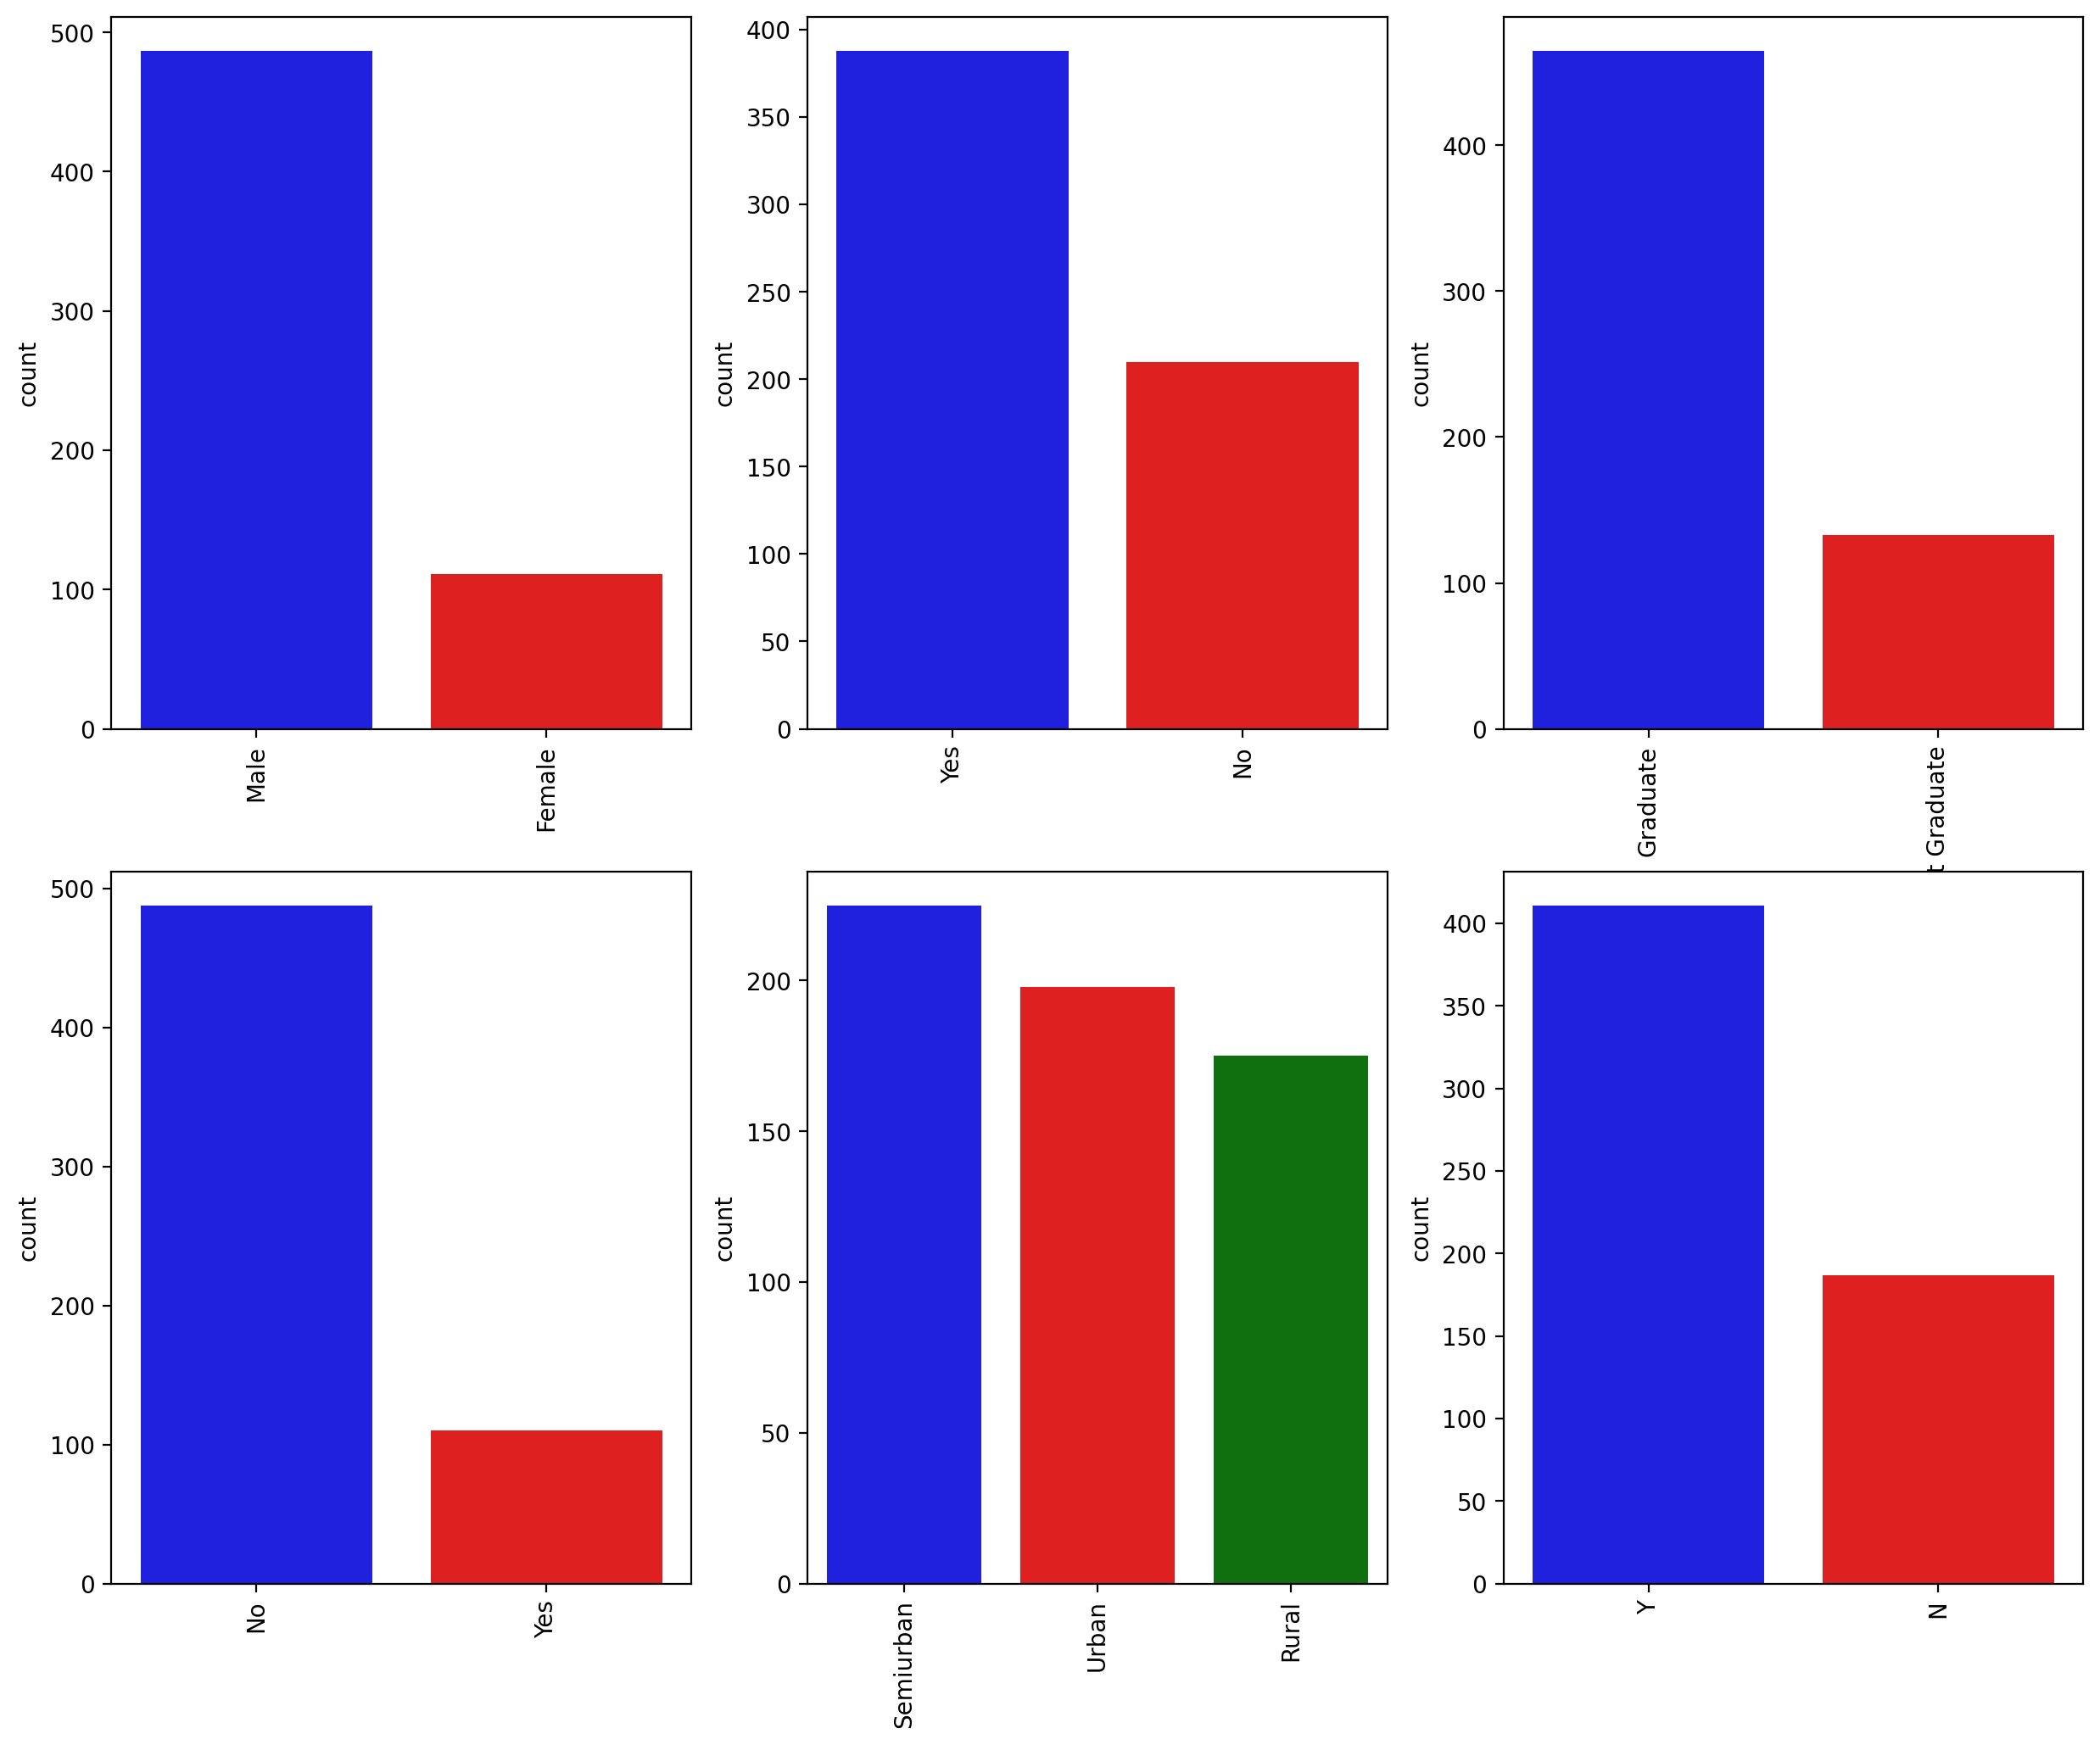

In [91]:
plt.figure(figsize=(15,12),dpi=200)
index=1
colors=['blue','red','green','brown']
for col in categorical_columns:
    y=data[col].value_counts()
    plt.subplot(2,3,index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index),y=y,palette=colors)
    index +=1

In [94]:
# this will convert the datatype of the categorical variables to int
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
for col in categorical_columns:
    data[col]=label_encoder.fit_transform(data[col])

In [100]:
data.dtypes

Gender                 int32
Married                int32
Dependents           float64
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [122]:
data.select_dtypes(include='object').columns.tolist()

[]

<Axes: >

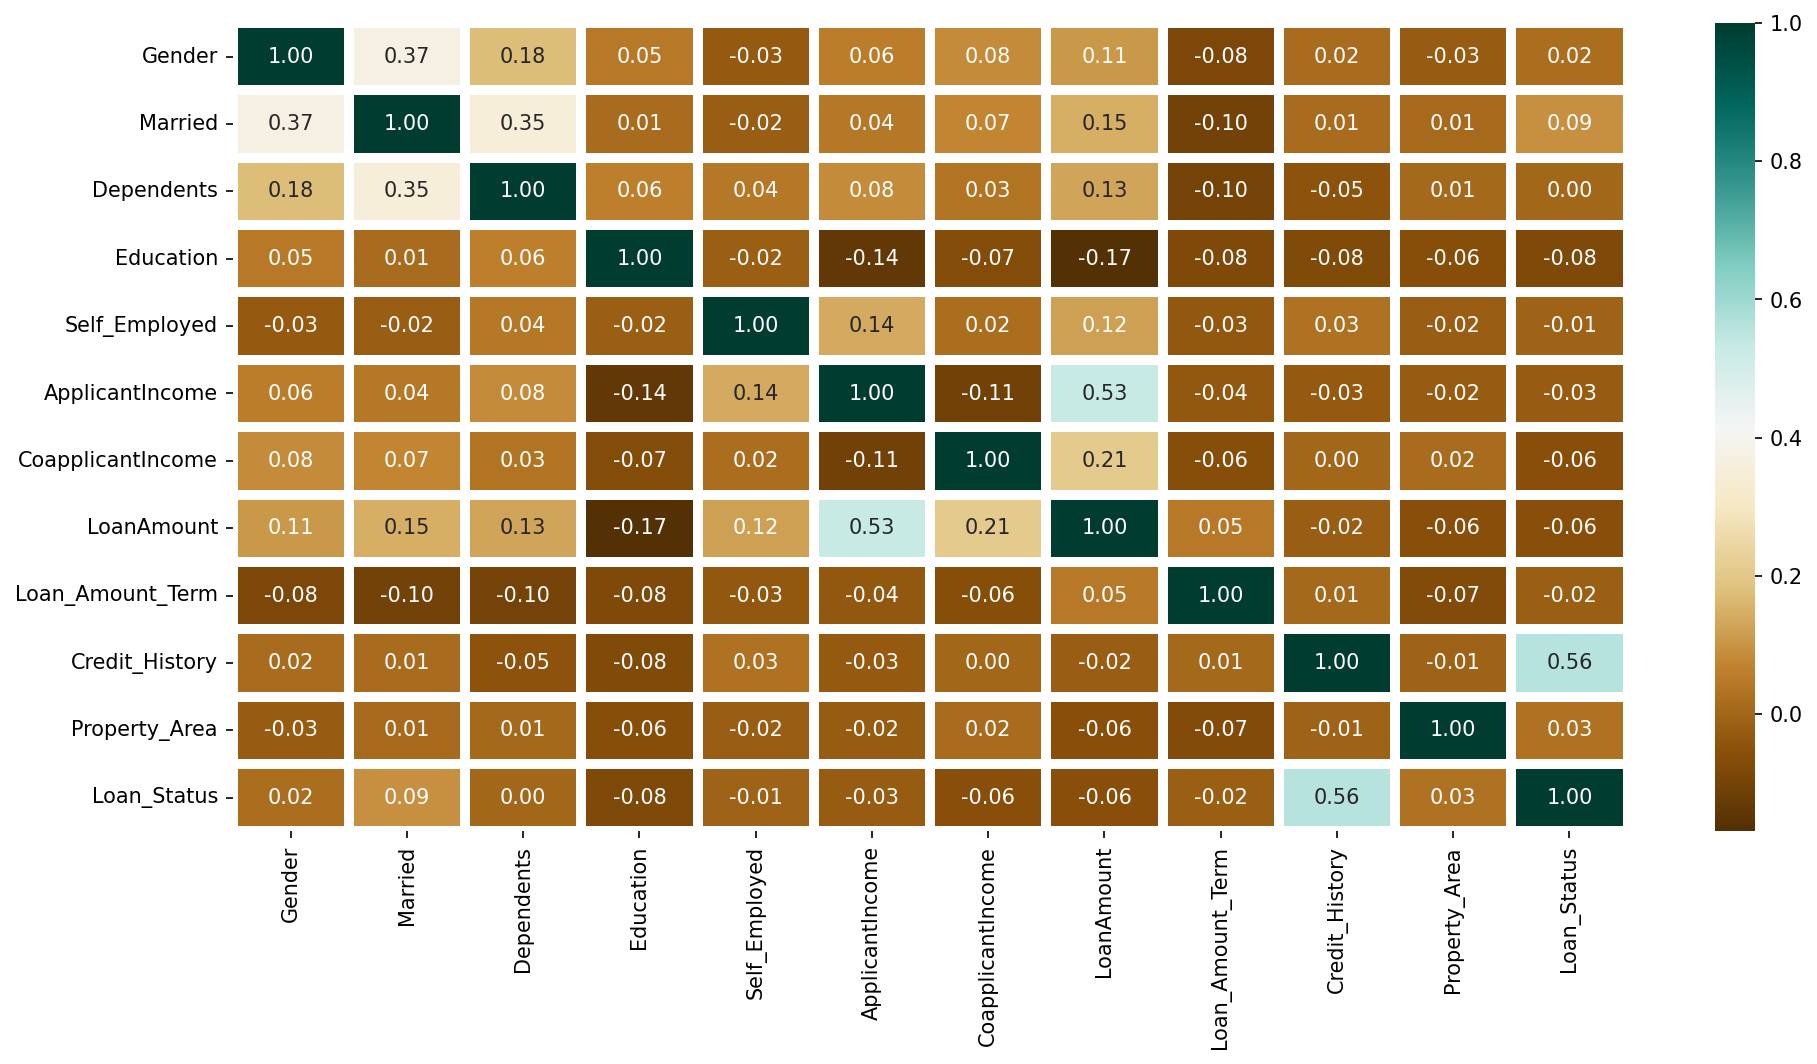

In [130]:
plt.figure(figsize=(15,7),dpi=150)
sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f',linewidths=4,annot=True)

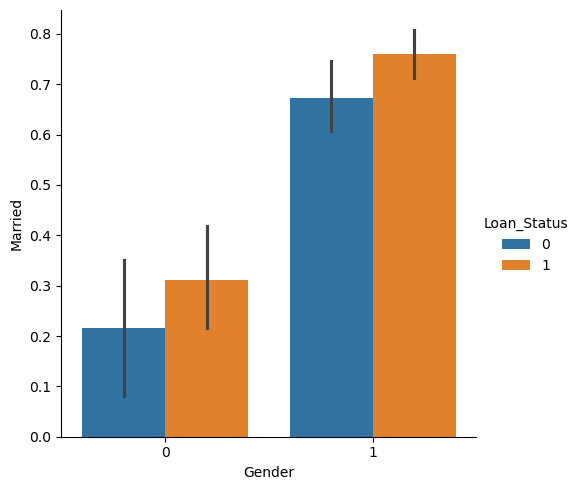

In [136]:
sns.catplot(x='Gender',y='Married',hue='Loan_Status',kind='bar',data=data)

In [138]:
data.isna().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [144]:
columns=data.columns.tolist()
columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [146]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
data[columns]=imputer.fit_transform(data[columns])

In [148]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    float64
 1   Married            598 non-null    float64
 2   Dependents         598 non-null    float64
 3   Education          598 non-null    float64
 4   Self_Employed      598 non-null    float64
 5   ApplicantIncome    598 non-null    float64
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         598 non-null    float64
 8   Loan_Amount_Term   598 non-null    float64
 9   Credit_History     598 non-null    float64
 10  Property_Area      598 non-null    float64
 11  Loan_Status        598 non-null    float64
dtypes: float64(12)
memory usage: 56.2 KB


In [158]:
from sklearn.model_selection import train_test_split
X=data.drop(['Loan_Status'],axis=1)
Y=data['Loan_Status']
X.shape,Y.shape
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.3,random_state=9)
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((418, 11), (180, 11), (418,), (180,))

In [160]:
from sklearn.ensemble import RandomForestClassifier as RFC
classifier = RFC()
classifier.fit(train_x,train_y)

RandomForestClassifier()

In [166]:
predicted_values=classifier.predict(train_x)
from sklearn.metrics import classification_report
print (classification_report(train_y,predicted_values))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       120
         1.0       1.00      1.00      1.00       298

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418



In [168]:
predicted_values=classifier.predict(test_x)
print(classification_report(test_y,predicted_values))

              precision    recall  f1-score   support

         0.0       0.87      0.51      0.64        67
         1.0       0.77      0.96      0.85       113

    accuracy                           0.79       180
   macro avg       0.82      0.73      0.75       180
weighted avg       0.81      0.79      0.77       180



In [174]:
from sklearn.metrics import accuracy_score

In [176]:
accuracy_score(test_y,predicted_values)

0.7888888888888889